In [13]:
import importlib
import sys
import os
import numpy as np
import math
from skimage import exposure

from Helpers import loadData, saveData
importlib.reload(sys.modules['Helpers.loadData'])
importlib.reload(sys.modules['Helpers.saveData'])
importlib.reload(sys.modules['Helpers'])

import matplotlib.pyplot as plt 

In [6]:
#data = loadData(location = r"C:\Users\Lab User\Desktop\temp1\Granular-Compression\Data", fileName = "downscale_17.hdf5")
data = loadData(r'/home/snow/Coding/Granular-Compression/Data','downscale_17.hdf5')

<KeysViewHDF5 ['default']>


In [55]:
axis = 'c'

sR,sC,sZ = np.shape(data)
collapseDict = {
'r': [(1,2), sR, (slice(None), np.newaxis, np.newaxis)],
'c': [(0,2), sC, (np.newaxis, slice(None), np.newaxis)],
'z': [(0,1), sZ, (np.newaxis, np.newaxis, slice(None))]
}
    
info = collapseDict[axis]
axialMeans = np.mean(data,axis=info[0])
centralMean = axialMeans[math.floor(info[1]/2)]
rescales = centralMean/axialMeans
rescaleArr = np.broadcast_to(rescales[info[2]], (sR, sC, sZ))
localNormed = data * rescaleArr
dataNorm = np.clip(exposure.rescale_intensity(localNormed, in_range='image', out_range=(0,1)), 0, 1)

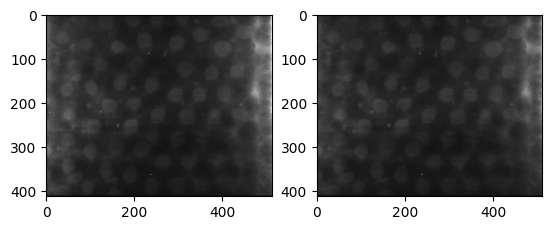

In [58]:
plt.subplot(1,2,1)
plt.imshow(data[:,:,0],cmap='grey')
plt.subplot(1,2,2)
plt.imshow(localNormed[:,:,0],cmap='grey')

In [45]:
A = np.arange(start=1,stop=10)
sS = len(A)
dog = np.broadcast_to(A[:,np.newaxis,np.newaxis], (sS,3,1))

print(f'A={A}')
#print(f'dog={dog}')
print(dog[:,:,0])
print(dog.shape)

A=[1 2 3 4 5 6 7 8 9]
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]
(9, 3, 1)


In [ ]:

axis = 'r'

sR,sC,sZ = np.shape(data)
collapseDict = {'r':[(1,2), sR, (:,np.newaxis,np.newaxis)], 'c':[(0,2),sC], 'z':[(0,1),sZ]}
info = collapseDict[axis]
    
    

axialMeans = np.mean(data,axis=info[0])
centralMean = axialMeans[math.floor(info[1]/2)]
rescales = centralMean/axialMeans
rescaleArr = np.broadcast_to(axialMeans[:, np.newaxis, np.newaxis], (sR, sC, sZ))


dataColNorm = data*rescales[:, np.newaxis, np.newaxis]
meow = np.ndarray.flatten(dataColNorm)
dataNorm = np.clip(exposure.rescale_intensity(dataColNorm, in_range='image', out_range=(0,1)), 0, 1)

SyntaxError: invalid syntax (2136967927.py, line 14)

In [55]:
saveData(data, r"C:\Users\Lab User\Desktop\temp1\Granular-Compression\Data", 'drugs.hdf5')

In [1]:
import numpy as np

In [ ]:
a = np.array([[[1, 2, 3 ],[4, 5, 6 ],[7, 8, 9 ]],  # Yellow represents row
              [[10,11,12],[13,14,15],[16,17,18]],  # Blue   represents column 
              [[19,20,21],[22,23,24],[25,26,27]]]) # Yellow
aa
print(a[0][:][:])

dog = np.mean(a,axis=(1))
print(dog)

cat = np.mean(dog,axis=(2))
print(cat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 4.  5.  6.]
 [13. 14. 15.]
 [22. 23. 24.]]


AxisError: axis 2 is out of bounds for array of dimension 2